# 

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import pickle

# set pandas to show all columns
pd.set_option("display.max_columns", None)

# import packages for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# adjust screensize
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/9f/r_bbpc3d25bcz1hkmh96cy780000gn/T/ipykernel_1180/87750938.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Import Credit Card Default Data

In [2]:
df = pd.read_csv("credit default.csv", skiprows=1) # we skip the first row because it contained variable symbol which is not required for the analysis

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploration and Cleaning

In [4]:
df.dtypes
# as expected, all the variables are in integer format, hence they are conducive for ML application

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

#### Notice that all the variables are in integer format which makes them conducive for ML algorithm. 

#### Some of the data in columns ["PAY_0" : "PAY_6"] are incorrectly entered as "-2" instead of "2". So this needs to be corrected

In [5]:
df.iloc[:, 6:12][(df.iloc[:, 6:12] == -2)].value_counts()

PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
-2.0   -2.0   -2.0   -2.0   -2.0   -2.0     2109
dtype: int64

In [6]:
df.iloc[:, 6:12].mask(df.iloc[:, 6:12]== (-2), 2, inplace=True)

/var/folders/9f/r_bbpc3d25bcz1hkmh96cy780000gn/T/ipykernel_1180/3920265885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 6:12].mask(df.iloc[:, 6:12]== (-2), 2, inplace=True)


#### This is to verify that "-2" has been replaced successfully

In [7]:
df.iloc[:, 6:12][(df.iloc[:, 6:12] == -2)].value_counts()

Series([], dtype: int64)

#### There is not need for "ID" column. So we drop it

In [8]:
df = df.drop("ID", axis=1)

In [9]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,2,2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df["MARRIAGE"].value_counts().sort_index(ascending=True)
# We see four values of MARRIAGE but the data description from the source says that marriage status values are {1: "married", 2: "Single", 3: "others"}
# hence we need to get rid of the instances where marriage is lableled as 0

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [11]:
df.shape

(30000, 24)

In [12]:
df.drop(df[df["MARRIAGE"]==0].index, axis=0, inplace=True)
# dropped the 54 instances where marriage was labelled as 0

In [13]:
df.shape
# we confirm that the shape has changed after dropping the instances of marriages with 0 labels

(29946, 24)

In [14]:
df["SEX"].value_counts()
# no issues with this feature because the values are coherent with the data description in UCI

2    18072
1    11874
Name: SEX, dtype: int64

In [15]:
df["AGE"].describe()
# no issues with Age feature because it is coherent with the description in UCI

count    29946.000000
mean        35.481300
std          9.218413
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [16]:
df["EDUCATION"].value_counts().sort_index(ascending=True)
# we notice that education is label between 0 and 6, but in the description provided in UCI, the values of Education is given as:
# {1: "Graduate School", 2: "University", 3: "High School", 4: others}
# so we need to remove the values 0, 5 and 6

0       14
1    10581
2    14024
3     4873
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [17]:
df.drop(df[(df["EDUCATION"]==0) | (df["EDUCATION"]==5) | (df["EDUCATION"]==6)].index, inplace=True)
# df.drop(df[(df['col_1'] == 1.0) & (df['col_2'] == 0.0)].index)

In [18]:
df.shape
# confirm that education values of 0, 5 and 6 are dropped

(29601, 24)

In [19]:
df.describe()
# as per the following, it seems there are no more issues with the remaining features

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,1.603189,1.815479,1.555454,35.464072,0.351002,0.371643,0.380730,0.361001,0.341272,0.361880,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374,0.223134
std,129944.020953,0.489244,0.710399,0.518092,9.213243,1.068421,1.148156,1.149459,1.136411,1.115439,1.131065,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739,0.416355
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


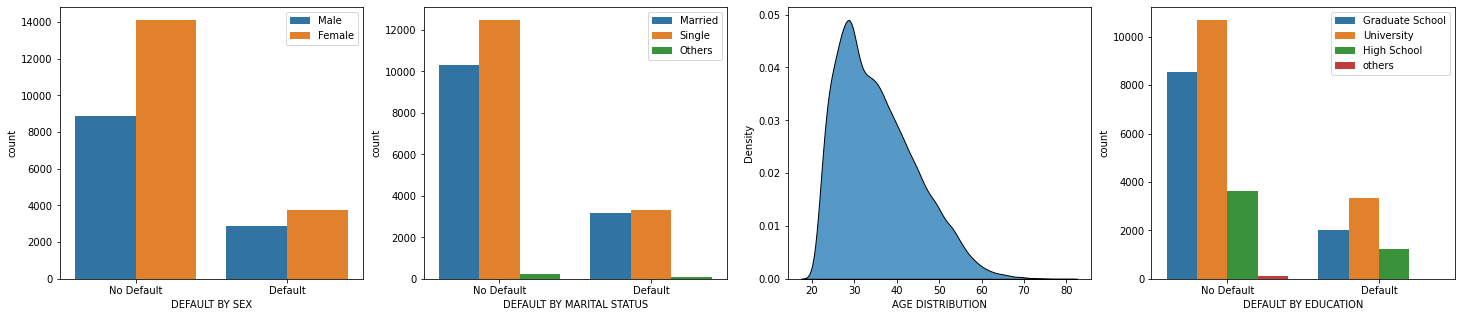

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(25,5))
# countplot to see default by sex
sns.countplot(x="default payment next month", data=df, hue="SEX", ax=ax[0])
ax[0].set_xticklabels(labels=["No Default", "Default"])
ax[0].set(xlabel="DEFAULT BY SEX")
ax[0].legend(labels=["Male", "Female"])



# countplot to see default by marriage status
sns.countplot(x="default payment next month", data=df, hue="MARRIAGE", ax=ax[1])
ax[1].set_xticklabels(labels=["No Default", "Default"])
ax[1].set(xlabel="DEFAULT BY MARITAL STATUS")
ax[1].legend(labels=["Married", "Single", "Others", "missing"])



# relation between age and default
sns.kdeplot(x="AGE", data=df, ax=ax[2], multiple="stack")
ax[2].set(xlabel="AGE DISTRIBUTION")

# relation between education and default
sns.countplot(x="default payment next month", data=df, hue="EDUCATION", ax=ax[3])
ax[3].set_xticklabels(labels=["No Default", "Default"])
ax[3].set(xlabel="DEFAULT BY EDUCATION")
ax[3].legend(labels=["Graduate School", "University", "High School", "others"])

plt.show()


# SEX(2=female and 1 = male). It turns out women represent the larger proportion of the sample and hence the default rate is higher for them. 

#### We divide the dataframe into and X and Y values

In [21]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(29601, 23)
(29601,)


### Feature Scaling
#### We noticed that the range of the variables are not similar, because age, income, credit card payments and balance limits have ranges that vary significantly. Hence, we scale the features to bring ranges to comparable values. Also note that we will only scale the continuous features and not the categorical ones because fractions in the latter case is meaningless 

In [22]:
scaler = StandardScaler()

In [23]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [24]:
x_categorical = x.drop(columns=['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', "AGE"])
x_continuous = x.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
x_continuous_sc = scaler.fit_transform(x_continuous)
x_continuous_sc = pd.DataFrame(x_continuous_sc, columns=x_continuous.columns)
x_continuous_sc.reset_index(inplace=True)
x_categorical.reset_index(inplace=True)
print(x_continuous_sc.shape)
print(x_categorical.shape)
# we notice that the continuous features have been scaled

(29601, 15)
(29601, 10)


In [25]:
x_new = pd.concat([x_continuous_sc, x_categorical], axis=1)
x_new.shape

(29601, 25)

### Splitting Data into Test and Training Set
#### The test data has 20% of the total data while the training dataset has the remaining 80%

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y, test_size=0.2)

#### We now apply the Logistic Regression Model 

In [27]:
model = LogisticRegression() # create Logistic Regression object

In [28]:
model.fit(x_train, y_train) # fit the training set

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_predict = model.predict(x_test) # predicting y values from the model after training

In [30]:
model.score(x_test, y_test)

0.7909136970106401

In [31]:
cf = metrics.confusion_matrix(y_test, y_predict)
cf.flatten()

array([4522,   86, 1152,  161])

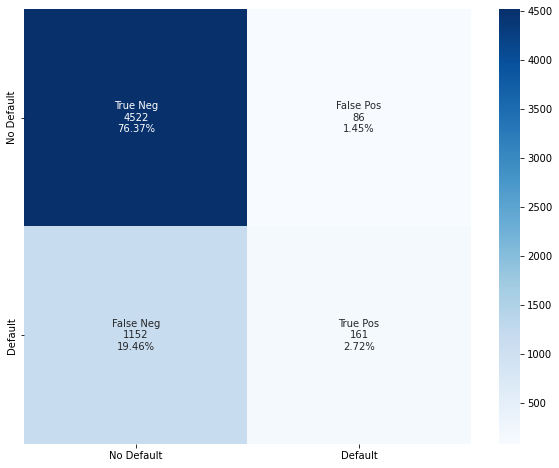

In [32]:
fig, ax = plt.subplots(figsize=(10,8));
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt="", cmap='Blues', linecolor="Black", cbar=True, ax=ax)
ax.set_xticklabels(labels=["No Default", "Default"])
ax.set_yticklabels(labels=["No Default", "Default"])
plt.show()

In [35]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))